Find exposures of a single night

In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio
from astropy.io import fits
import healpy as hp
from astropy import wcs

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [4]:
a = np.random.choice(10, size=100)
a_uniq, n = np.unique(a, return_counts=True)

In [8]:
a

array([0, 8, 0, 3, 0, 2, 4, 7, 8, 6, 2, 3, 1, 6, 3, 1, 9, 6, 9, 1, 2, 8,
       1, 0, 0, 1, 7, 3, 8, 9, 9, 1, 4, 2, 8, 9, 4, 4, 1, 9, 6, 3, 5, 5,
       5, 0, 1, 3, 0, 3, 0, 9, 9, 6, 5, 8, 0, 4, 1, 1, 7, 7, 1, 4, 9, 4,
       9, 4, 9, 0, 5, 4, 6, 6, 4, 1, 8, 1, 0, 6, 4, 1, 7, 3, 2, 9, 3, 5,
       2, 7, 9, 0, 3, 8, 5, 2, 5, 9, 8, 4])

In [5]:
a_uniq

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
n

array([12, 14,  7, 10, 12,  8,  8,  6,  9, 14])

In [7]:
a_uniq[np.argsort(n)]

array([7, 2, 5, 6, 8, 3, 0, 4, 1, 9])

-------

In [24]:
cat = Table.read('/Users/rongpu/Downloads/fiberassign-063519.fits', hdu=1)
print(len(cat))
cat[:3]

5000


TARGETID,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,PMRA_IVAR,PMDEC_IVAR,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,NUMTARGET,PRIORITY,SUBPRIORITY,OBSCONDITIONS,NUMOBS_MORE,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,TARGET_RA_IVAR,TARGET_DEC_IVAR,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,FRACDEV,FRACDEV_IVAR,SHAPEDEV_R,SHAPEDEV_E1,SHAPEDEV_E2,SHAPEDEV_R_IVAR,SHAPEDEV_E1_IVAR,SHAPEDEV_E2_IVAR,SHAPEEXP_R,SHAPEEXP_E1,SHAPEEXP_E2,SHAPEEXP_R_IVAR,SHAPEEXP_E1_IVAR,SHAPEEXP_E2_IVAR,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PHOTSYS,CMX_TARGET,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL,BLOBDIST,FIBERFLUX_IVAR_G,FIBERFLUX_IVAR_R,FIBERFLUX_IVAR_Z,DESI_TARGET,BGS_TARGET,MWS_TARGET
int64,int16,int32,int32,int32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int16,int32,float64,int32,int32,int16,int32,bytes8,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bool,float32,float32,bytes1,int64,int64,int64,int64,float32,float32,float32,float32,int64,int64,int64
35185740249827744,0,311,311,0,0,36.830556528973695,-0.8010145877601095,0.0,0.0,0.0,0.0,0.0,5400.0,3072,1,TGT,79.903755,-286.44708,0,146,0.8079579987132303,65535,19,8000,326195,0368m007,2464,REX,25757385000.0,25859090000.0,0.03180336,0.8608838,1.5394902,5.6608167,611.16113,425.2658,42.31885,0.9101513,0.9385519,0.96514916,0.00613167,0.007525211,0.4922325,0.011950016,0.010585088,0.009871053,0.83077705,0.9971594,0.7972685,5,5,4,1982.893,1734.826,187.73157,1181.5708,890.0534,89.91916,25.300037,16.866125,32.977318,-429.58725,2.6010594,0.50518095,0.0013788524,2.0099335e-05,0.9946248,0.99669546,0.99929434,0.9997335,0,0,0,0.28532845,0.5102435,1.8762021,0.28532845,0.5102435,1.8762021,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85505587,0.0,0.0,2644.176,0.0,0.0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,False,0.0,0.0,S,3072,146,1,17763,0.0,0.0,0.0,0.0,0,0,0
35185740249829229,0,272,272,1,0,36.92128734054688,-0.7627545447260339,0.0,0.0,0.0,0.0,0.0,5400.0,1280,1,TGT,57.172874,-276.3174,0,154,0.6574058825949336,65535,19,8000,326195,0368m007,3949,DEV,2174581000000.0,2028861100000.0,0.034109414,12.032043,35.077988,68.693634,168.1684,92.40404,13.606858,0.90395945,0.934246,0.9626699,0.0,0.0,0.0,0.05223402,0.10060272,0.046049297,0.9104515,0.9222559,0.91516805,4,4,4,1697.0106,1289.1819,145.96317,988.6826,695.0369,73.99371,103.67042,75.87803,59.655083,228.50813,1.6677758,0.34116018,0.0011060586,1.8299814e-05,0.9942362,0.99645627,0.99924314,0.99971414,0,0,0,2.685756,7.830

In [54]:
' '.join(cat.colnames)

'TARGETID PETAL_LOC DEVICE_LOC LOCATION FIBER FIBERSTATUS TARGET_RA TARGET_DEC PMRA PMDEC PMRA_IVAR PMDEC_IVAR REF_EPOCH LAMBDA_REF FA_TARGET FA_TYPE OBJTYPE FIBERASSIGN_X FIBERASSIGN_Y NUMTARGET PRIORITY SUBPRIORITY OBSCONDITIONS NUMOBS_MORE RELEASE BRICKID BRICKNAME BRICK_OBJID MORPHTYPE TARGET_RA_IVAR TARGET_DEC_IVAR EBV FLUX_G FLUX_R FLUX_Z FLUX_IVAR_G FLUX_IVAR_R FLUX_IVAR_Z MW_TRANSMISSION_G MW_TRANSMISSION_R MW_TRANSMISSION_Z FRACFLUX_G FRACFLUX_R FRACFLUX_Z FRACMASKED_G FRACMASKED_R FRACMASKED_Z FRACIN_G FRACIN_R FRACIN_Z NOBS_G NOBS_R NOBS_Z PSFDEPTH_G PSFDEPTH_R PSFDEPTH_Z GALDEPTH_G GALDEPTH_R GALDEPTH_Z FLUX_W1 FLUX_W2 FLUX_W3 FLUX_W4 FLUX_IVAR_W1 FLUX_IVAR_W2 FLUX_IVAR_W3 FLUX_IVAR_W4 MW_TRANSMISSION_W1 MW_TRANSMISSION_W2 MW_TRANSMISSION_W3 MW_TRANSMISSION_W4 ALLMASK_G ALLMASK_R ALLMASK_Z FIBERFLUX_G FIBERFLUX_R FIBERFLUX_Z FIBERTOTFLUX_G FIBERTOTFLUX_R FIBERTOTFLUX_Z WISEMASK_W1 WISEMASK_W2 MASKBITS FRACDEV FRACDEV_IVAR SHAPEDEV_R SHAPEDEV_E1 SHAPEDEV_E2 SHAPEDEV_R_IVAR S

/Users/rongpu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  


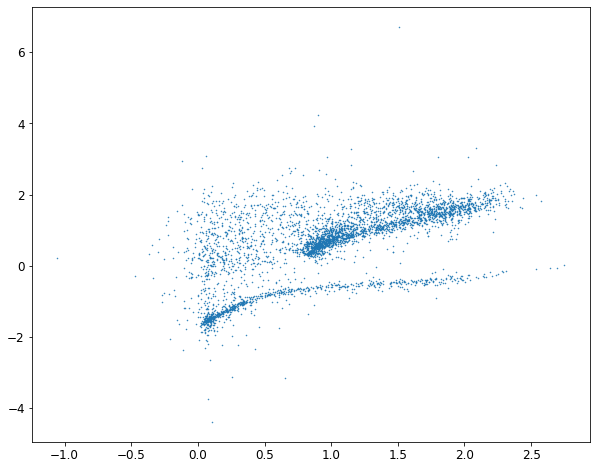

In [27]:
plt.figure(figsize=(10, 8))
plt.plot(cat['rmag']-cat['zmag'], cat['zmag']-cat['w1mag'], '.', ms=1)
plt.show()

In [46]:
import yaml

with open('/Users/rongpu/Downloads/cmx_targetmask.yaml') as file:
    tmp = yaml.load(file, Loader=yaml.FullLoader)
# print(tmp.keys())

mask_names = []
mask_bits = []
for index in range(len(tmp['cmx_mask'])):
    mask_names.append(tmp['cmx_mask'][index][0])
    mask_bits.append(tmp['cmx_mask'][index][1])

def bitmask_summary(mask_values, mask_names, bits):
    mask_values = np.array(mask_values, dtype=np.uint64)
    t = Table()
    t['name'] = np.concatenate([['None'], mask_names])
    t['bit'] = np.concatenate([[-1], bits])
    t['count'] = 0
    t['count'][0] = np.sum(mask_values==0)
    for index in range(len(bits)):
        bit = bits[index]
        t['count'][index+1] = np.sum(mask_values & (2**bit)>0)
    t['frac (%)'] = t['count']/len(mask_values)*100
    t['frac (%)'].format = "%.3f"
    return t

In [47]:
mask_names

['STD_GAIA',
 'SV0_STD_FAINT',
 'SV0_STD_BRIGHT',
 'STD_TEST',
 'STD_CALSPEC',
 'STD_DITHER',
 'SV0_BGS',
 'SV0_MWS',
 'SV0_LRG',
 'SV0_ELG',
 'SV0_QSO',
 'SV0_WD',
 'BACKUP_BRIGHT',
 'BACKUP_FAINT',
 'M31_STD_BRIGHT',
 'M31_H2PN',
 'M31_GC',
 'M31_QSO',
 'M31_VAR',
 'M31_BSPL',
 'M31_M31cen',
 'M31_M31out',
 'ORI_STD_BRIGHT',
 'ORI_QSO',
 'ORI_ORI',
 'ORI_HA',
 'ROS_STD_BRIGHT',
 'ROS_QSO',
 'ROS_ROSM17',
 'ROS_ROS1',
 'ROS_HA',
 'ROS_ROS2',
 'M33_STD_BRIGHT',
 'M33_H2PN',
 'M33_GC',
 'M33_QSO',
 'M33_M33cen',
 'M33_M33out',
 'SKY',
 'STD_FAINT',
 'STD_BRIGHT',
 'BAD_SKY',
 'SUPP_SKY']

In [49]:
res = bitmask_summary(cat['CMX_TARGET'], mask_names, mask_bits)

In [53]:
mask = cat['CMX_TARGET'] & (2**10) > 0
np.sum(mask)/len(mask)

0.4896

In [50]:
res.pprint_all()

     name      bit count frac (%)
-------------- --- ----- --------
          None  -1   899   17.980
      STD_GAIA   0   806   16.120
 SV0_STD_FAINT   1   149    2.980
SV0_STD_BRIGHT   2   104    2.080
      STD_TEST   3    87    1.740
   STD_CALSPEC   4     0    0.000
    STD_DITHER   5   948   18.960
       SV0_BGS   8   706   14.120
       SV0_MWS   9   522   10.440
       SV0_LRG  10  2448   48.960
       SV0_ELG  11   266    5.320
       SV0_QSO  12   769   15.380
        SV0_WD  13     0    0.000
 BACKUP_BRIGHT  16     0    0.000
  BACKUP_FAINT  17     0    0.000
M31_STD_BRIGHT  18     0    0.000
      M31_H2PN  19     0    0.000
        M31_GC  20     0    0.000
       M31_QSO  21     0    0.000
       M31_VAR  22     0    0.000
      M31_BSPL  23     0    0.000
    M31_M31cen  24     0    0.000
    M31_M31out  25     0    0.000
ORI_STD_BRIGHT  26     0    0.000
       ORI_QSO  27     0    0.000
       ORI_ORI  28     0    0.000
        ORI_HA  29     0    0.000
ROS_STD_BRIGHT